# Установка и импорт необходимых моуделй



In [1]:
!pip install catboost
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 157.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 50.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0da63e70446445c3ca892d64deb771fd4a4691ad1b2406e887ffbf7a0a129028
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
# при работе через Google Colab
# прописать путь до всех файлов py
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Учёба/8 семестр/диплом/Проект/VKR/Блокноты')

Mounted at /content/drive


In [3]:
import AnalysisFunc
import BaseFuncs
import PredictionSplit
import PredictionResults

ДЛЯ ПРОГНОЗИРОВАНИЙ ДОСТУПНЫ СЛЕДУЮЩИЕ ПОДСЧЕТЫ ОШИБОК/ТОЧНОСТЕЙ:
recall
f1
r2
mae


In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from itertools import chain

# Загрузка данных прошлого года и нынешнего
Для прошлого года создаются датафреймы с очищенными выбросами по Q и Z

In [6]:
data = BaseFuncs.GetDataFrameListFromFileConverted("/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/Преобразованные/ПиОА 1.csv")
data = AnalysisFunc.MakeFloat(data, ["Пол"])
data_Q = AnalysisFunc.DeleteByQuantile(data, 0.15)
data_Z = AnalysisFunc.DeleteByZ(data)
data_dict = {"Original": data, "Квартиль": data_Q, "По Z": data_Z}
data.head(5)

,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Процент баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Процент баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Процент баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,0,0.93,0.160,8.0,0.52,0.1200,1.0,0.060,3.0,0.26,0.1200,0.43,0.10,5.0,0.43,0.120
1,1.0,1,1.00,0.035,3.0,0.11,0.0738,1.0,0.012,2.0,0.05,0.0449,1.00,0.00,0.0,0.00,0.075
2,1.0,1,0.00,0.000,0.0,0.00,0.0000,0.0,0.000,0.0,0.00,0.0000,0.00,0.00,0.0,0.00,0.000
3,0.0,0,1.00,0.150,8.0,0.48,0.1170,1.0,0.060,3.0,0.26,0.1180,1.00,0.08,4.0,0.35,0.155
4,0.0,0,0.86,0.160,8.0,0.52,0.0448,0.5,0.060,3.0,0.26,0.1008,1.00,0.08,4.0,0.35,0.150


In [7]:
dataReal = BaseFuncs.GetDataFrameListFromFileConverted("/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/Преобразованные/ПиОА тест.csv")
dataReal = AnalysisFunc.MakeFloat(dataReal, ["Пол"])
dataReal.head(5)

,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Процент баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Процент баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Процент баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,1,0.3,0.048,3.0,0.30,0.010,0.2,0.025,2.0,0.12,0.0000,0.25,0.093,5.0,0.26,0.000
1,0.0,0,0.7,0.160,8.0,1.00,0.091,0.8,0.090,4.0,0.43,0.1304,0.75,0.100,4.0,0.28,0.110
2,1.0,1,1.0,0.000,0.0,0.00,0.030,0.8,0.000,0.0,0.00,0.0000,0.12,0.000,0.0,0.00,0.000
3,1.0,1,0.9,0.020,2.0,0.12,0.019,1.0,0.085,3.0,0.40,0.0170,1.00,0.020,2.0,0.06,0.057
4,1.0,1,0.5,0.020,1.0,0.12,0.038,0.2,0.000,0.0,0.00,0.0000,0.12,0.000,0.0,0.00,0.000


# Словари моделей прогнозирования

In [20]:
models = {  "k-ближайших соседей": KNeighborsClassifier(leaf_size=20, metric='minkowski', n_neighbors=12, p=2, weights='uniform'),
            "Рандомный лес": RandomForestClassifier(max_depth=15, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100),
            "Дерево решений": DecisionTreeClassifier(max_depth=9, random_state=0),
            "CatBoost": CatBoostClassifier(iterations=31, learning_rate=0.1, silent=True, allow_writing_files=False),
            "AdaBoostClassifier": AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=2.0, n_estimators=48)}
models_regres = { "k-ближайших соседей": KNeighborsRegressor(leaf_size=34, metric='minkowski', n_neighbors= 15, p=1, weights='uniform'),
            "Рандомный лес": RandomForestRegressor(bootstrap=True, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=14),
            "CatBoostRegressor": CatBoostRegressor(iterations=61, learning_rate=0.1, depth=2, silent=True, allow_writing_files=False),
            "AdaBoostRegressor": AdaBoostRegressor(learning_rate=0.1, loss='linear', n_estimators=8), #), \
            "Ridge": Ridge(),  \
            "LinearRegression": LinearRegression()}

# ИНФО

**Разделение датафреймов на X и Y** происходит через функции:

`PredictionSplit.SplitTestTrainPass(data, exam, not_for_prediction)` (Y - отметки о сдаче)

`PredictionSplit.SplitTestTrainTest(data, exam, not_for_prediction)` (Y - отметки о баллах контрольной)

где `not_for_prediction` - список параметров, которые не должны выходить в выборку X

**Прогнозирование** производится через функции:


---

**Получение словаря с ошибками/точностями**, где ключи - названия моделей из словаря `models`
`PredictionResults.PredictionModel(X, Y, models, test_size, accuracy_type)`

и

`PredictionResults.PredictionModelNew(X, Y, x_, y_, models, accuracy_type)`


---


**Получение словаря с матрицами ошибок**, где ключи - названия моделей из словаря `models`
`PredictionResults.PredictionModelMatrix(X, Y, models, test_size)`

и

`PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)`


---


`accuracy_type` берется из словаря:


```
accuracy_dict = {
    "recall": recall_score,
    "f1": f1_score,
    "r2": r2_score,
    "mae": mean_absolute_error
}
```



# Прогнозирование train_split
Данные прошлого года делятся на тренировочную и тестовую выборку (проверка для оригинальных данных, так и для очищенных)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       192
           1       0.92      0.93      0.92        97

    accuracy                           0.95       289
   macro avg       0.94      0.94      0.94       289
weighted avg       0.95      0.95      0.95       289





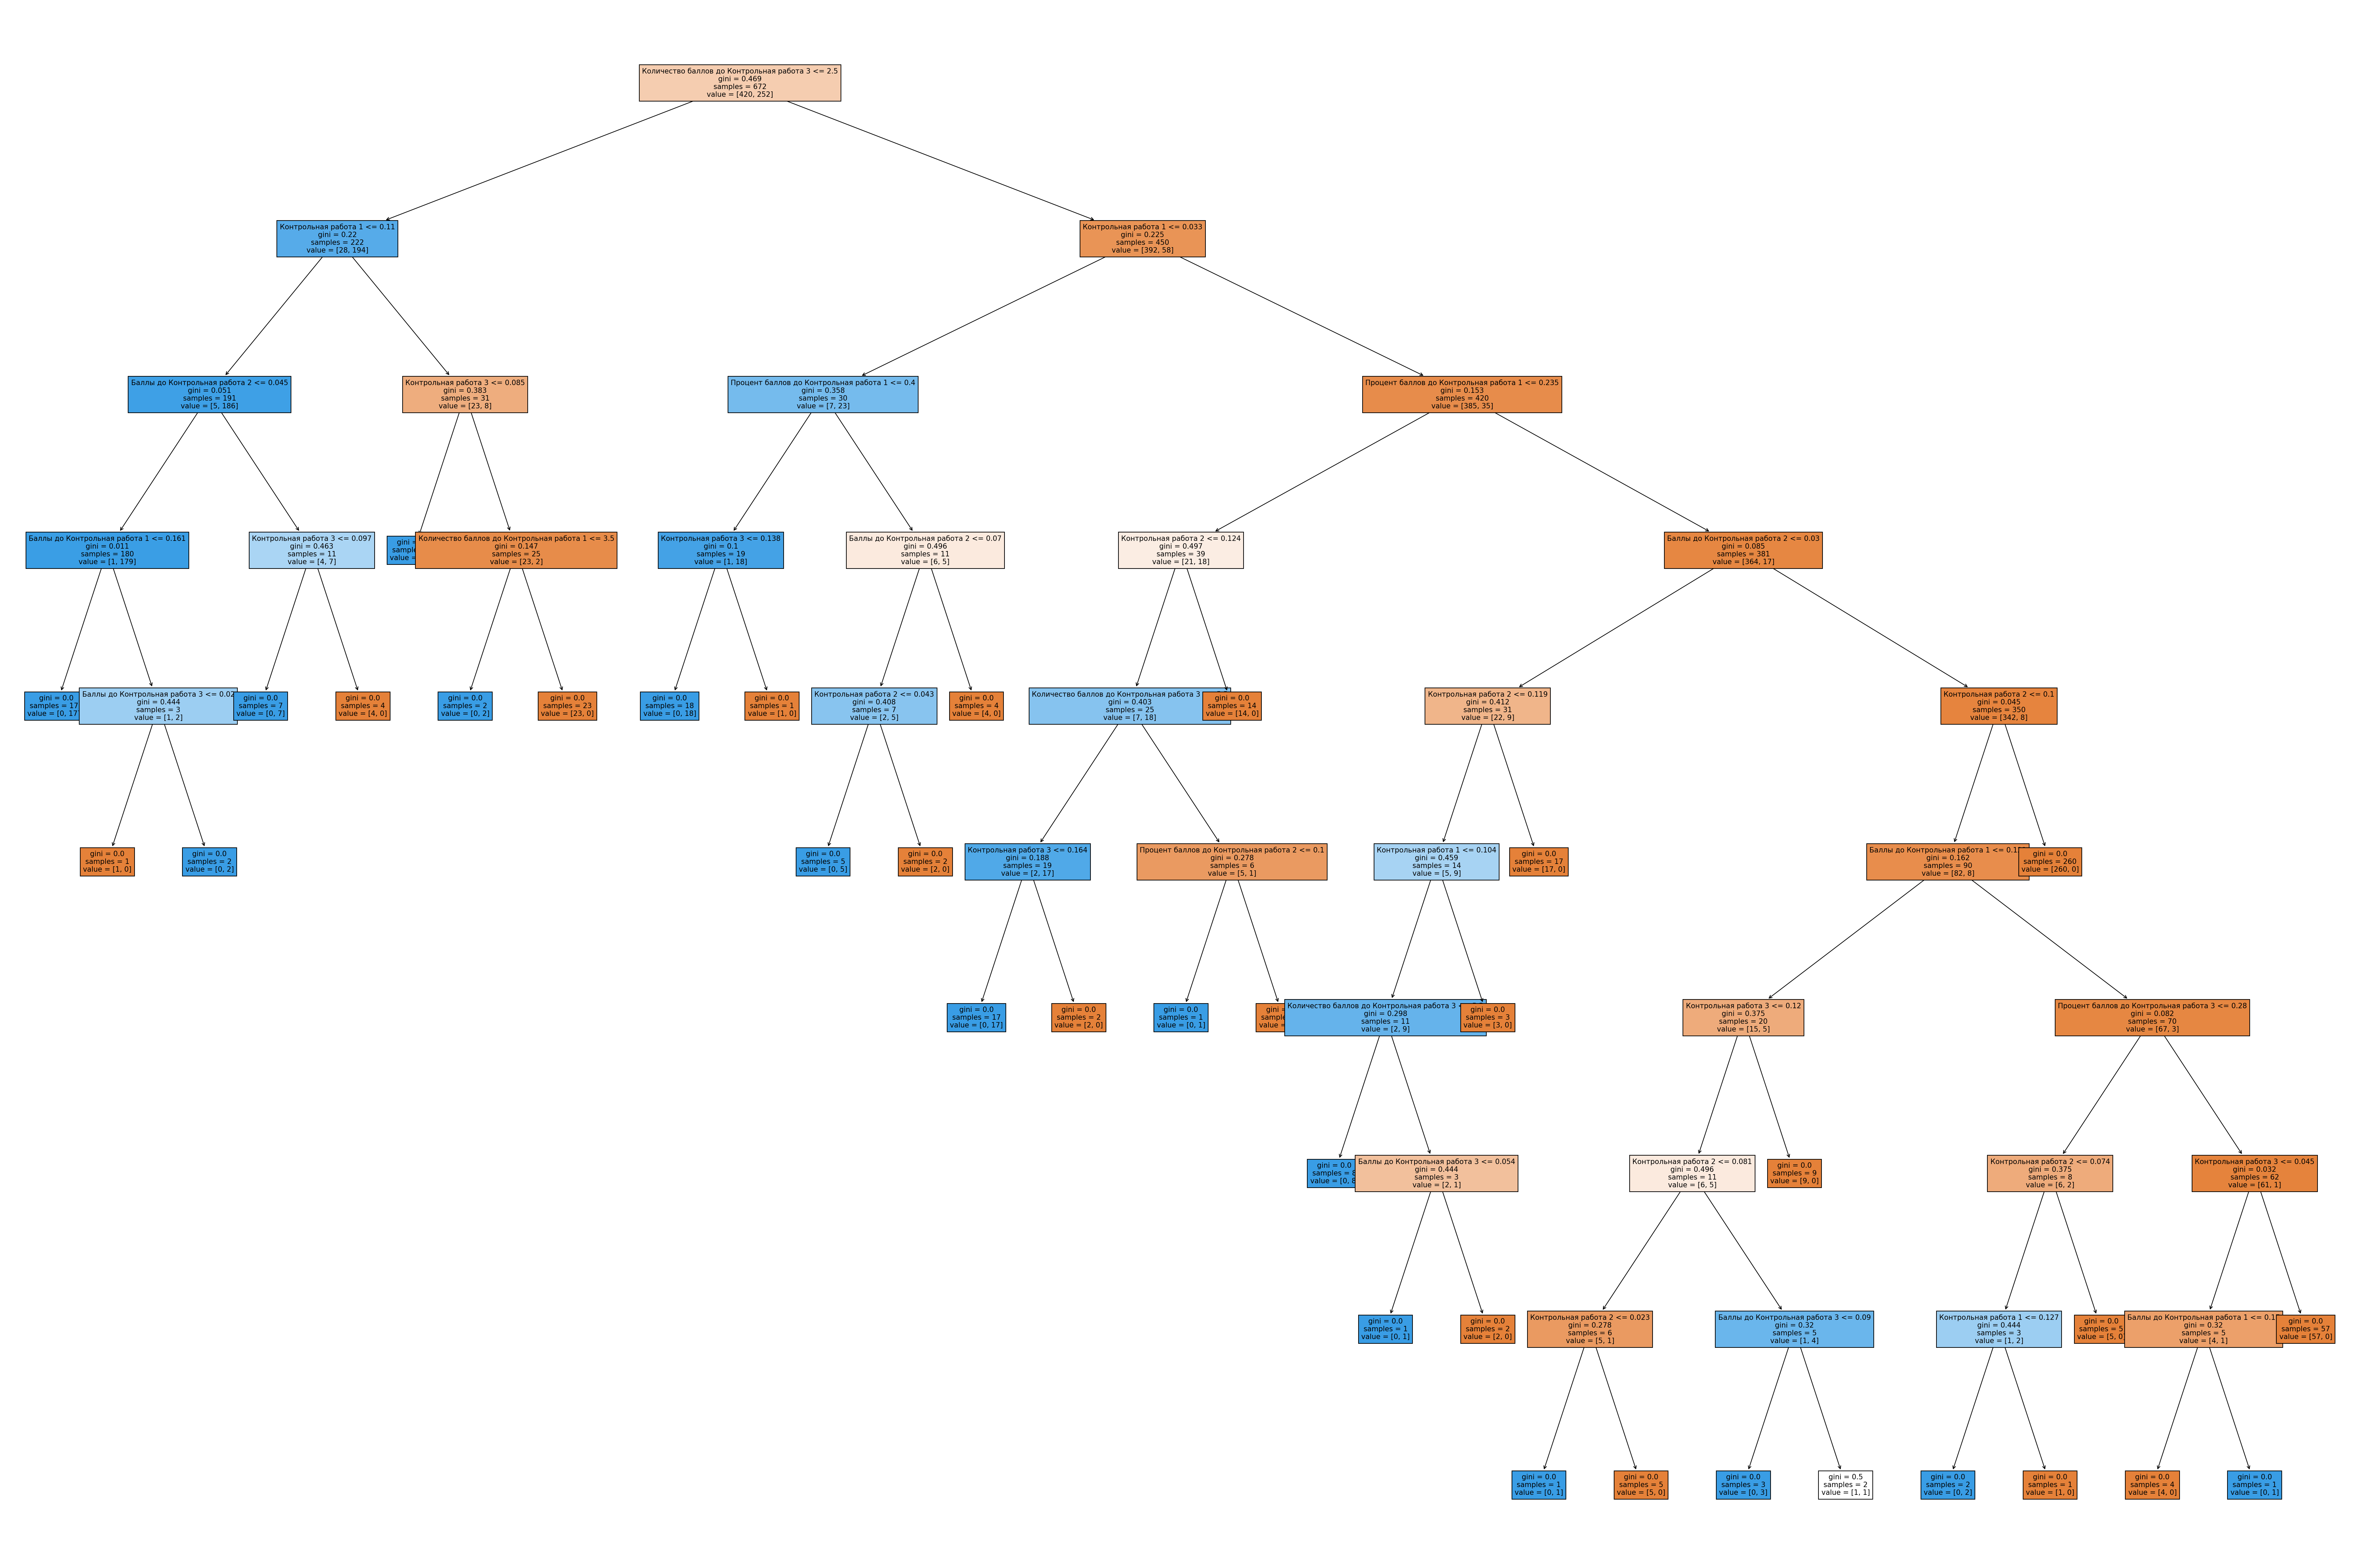

In [18]:
# дерево решений
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
X, Y = PredictionSplit.SplitTestTrainPass(data, ex, ["Оценка"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=27)
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(60,40),dpi=150, )
    plot_tree(model,filled=True,feature_names=X.columns, fontsize=10)
    plt.show()
#pruned tree поменяй на своё
pruned_tree = DecisionTreeClassifier(max_depth=9, random_state=0)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

**Сдача дисциплины**

In [21]:
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование сдачи дисциплины")
    results = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)
    results_corr_more_01 = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainPass(d, ex, ["Оценка"])
        pred_res = PredictionResults.PredictionModel(X, Y, models, 0.3, "recall")
        for key, val in pred_res.items():
            results[ex][key] = val


        X, Y = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка"])
        pred_res = PredictionResults.PredictionModel(X, Y, models, 0.3, "recall")
        for key, val in pred_res.items():
            results_corr_more_01[ex][key] = val

    display(results)
    print("Без учета пола")
    display(results_corr_more_01)

Данные: Original
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.649,0.763,0.784
Рандомный лес,0.711,0.835,0.918
Дерево решений,0.753,0.866,0.928
CatBoost,0.742,0.866,0.897
AdaBoostClassifier,0.66,0.794,0.835


Без учета пола


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.66,0.732,0.753
Рандомный лес,0.732,0.835,0.887
Дерево решений,0.742,0.887,0.887
CatBoost,0.742,0.866,0.918
AdaBoostClassifier,0.68,0.804,0.835


Данные: Квартиль
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.713,0.777,0.787
Рандомный лес,0.809,0.872,0.926
Дерево решений,0.734,0.883,0.883
CatBoost,0.809,0.894,0.915
AdaBoostClassifier,0.755,0.851,0.862


Без учета пола


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.734,0.766,0.787
Рандомный лес,0.798,0.894,0.926
Дерево решений,0.766,0.883,0.883
CatBoost,0.798,0.894,0.915
AdaBoostClassifier,0.755,0.862,0.862


Данные: По Z
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.689,0.767,0.709
Рандомный лес,0.757,0.825,0.854
Дерево решений,0.718,0.854,0.932
CatBoost,0.777,0.816,0.874
AdaBoostClassifier,0.728,0.786,0.825


Без учета пола


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.699,0.777,0.728
Рандомный лес,0.777,0.806,0.835
Дерево решений,0.738,0.806,0.922
CatBoost,0.796,0.825,0.864
AdaBoostClassifier,0.748,0.806,0.825


**Результаты контрольной**

In [22]:
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование контрольных без учета оценок")
    results = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)
    results_corr_more_01 = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainTest(d, ex, ["Оценка"])
        pred_res = PredictionResults.PredictionModel(X, Y, models_regres, 0.3, "mae")
        for key, val in pred_res.items():
            results[ex][key] = val*100

        X, Y = PredictionSplit.SplitTestTrainTest(d, ex, ["Пол", "Оценка"])
        pred_res = PredictionResults.PredictionModel(X, Y, models_regres, 0.3, "mae")
        for key, val in pred_res.items():
            results_corr_more_01[ex][key] = val*100
    display(results)
    print("Без учета пола")
    display(results_corr_more_01)

Данные: Original
Прогнозирование контрольных без учета оценок


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.6,3.7,3.6
Рандомный лес,3.4,3.1,2.9
CatBoostRegressor,3.4,3.1,2.8
AdaBoostRegressor,3.4,3.1,2.7
Ridge,3.5,3.2,3.0
LinearRegression,3.5,3.1,2.9


Без учета пола


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.5,3.5,3.6
Рандомный лес,3.4,3.1,2.9
CatBoostRegressor,3.4,3.1,2.8
AdaBoostRegressor,3.5,3.2,2.8
Ridge,3.5,3.3,3.0
LinearRegression,3.5,3.1,2.9


Данные: Квартиль
Прогнозирование контрольных без учета оценок


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.3,3.3,3.7
Рандомный лес,3.1,3.1,2.9
CatBoostRegressor,3.2,3.0,2.8
AdaBoostRegressor,3.1,3.1,3.0
Ridge,3.1,3.2,3.1
LinearRegression,3.1,3.0,2.9


Без учета пола


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.3,3.4,3.8
Рандомный лес,3.2,3.0,2.9
CatBoostRegressor,3.1,3.0,2.9
AdaBoostRegressor,3.2,3.1,3.0
Ridge,3.1,3.2,3.1
LinearRegression,3.1,3.0,2.9


Данные: По Z
Прогнозирование контрольных без учета оценок


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.2,3.4,3.5
Рандомный лес,3.1,3.0,3.0
CatBoostRegressor,3.1,3.0,2.8
AdaBoostRegressor,3.1,3.1,3.0
Ridge,3.1,3.0,3.0
LinearRegression,3.1,2.9,2.9


Без учета пола


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.2,3.4,3.5
Рандомный лес,3.1,3.0,3.0
CatBoostRegressor,3.1,3.0,2.9
AdaBoostRegressor,3.1,3.1,3.1
Ridge,3.1,3.0,3.0
LinearRegression,3.1,2.9,2.9


# Прогнозирование данных текущего года
Данные прошлого года считаются обучающими, а данные этого года - тестовыми

**Сдача дисциплины**

In [23]:
print("Сравнение на реальных данных")
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование сдачи дисциплины")
    results = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка"])
        x_, y_ = PredictionSplit.SplitTestTrainPass(dataReal, ex, ["Пол", "Оценка"])
        results[ex] = ""
        pred_res_matrix = PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models, "recall")

        for key, val in pred_res.items():
            results[ex][key] = str(pred_res[key]) + "    " + str(pred_res_matrix[key])

    display(results)

    print("Без учета процента набранных баллов:")
    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainPass(dataReal, ex, ["Пол", "Оценка"]+AnalysisFunc.before)
        results[ex] = ""
        pred_res_matrix = PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models, "recall")

        for key, val in pred_res.items():
            results[ex][key] = str(pred_res[key]) + "    " + str(pred_res_matrix[key])

    display(results)


Сравнение на реальных данных
Данные: Original
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.678 [[618 51]\n [ 94 198]],0.733 [[574 95]\n [ 78 214]],0.723 [[592 77]\n [ 81 211]]
Рандомный лес,0.753 [[622 47]\n [ 79 213]],0.798 [[636 33]\n [ 60 232]],0.86 [[620 49]\n [ 43 249]]
Дерево решений,0.757 [[596 73]\n [ 71 221]],0.74 [[632 37]\n [ 76 216]],0.822 [[584 85]\n [ 52 240]]
CatBoost,0.712 [[628 41]\n [ 84 208]],0.822 [[646 23]\n [ 52 240]],0.877 [[632 37]\n [ 36 256]]
AdaBoostClassifier,0.736 [[582 87]\n [ 77 215]],0.75 [[576 93]\n [ 73 219]],0.805 [[564 105]\n [ 57 235]]


Без учета процента набранных баллов:


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.726 [[593 76]\n [ 80 212]],0.733 [[574 95]\n [ 78 214]],0.733 [[588 81]\n [ 78 214]]
Рандомный лес,0.815 [[597 72]\n [ 56 236]],0.832 [[609 60]\n [ 48 244]],0.873 [[616 53]\n [ 36 256]]
Дерево решений,0.747 [[594 75]\n [ 74 218]],0.87 [[582 87]\n [ 38 254]],0.863 [[597 72]\n [ 40 252]]
CatBoost,0.784 [[595 74]\n [ 63 229]],0.853 [[616 53]\n [ 43 249]],0.884 [[628 41]\n [ 34 258]]
AdaBoostClassifier,0.818 [[511 158]\n [ 53 239]],0.818 [[542 127]\n [ 53 239]],0.849 [[526 143]\n [ 44 248]]


Данные: Квартиль
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.688 [[615 54]\n [ 91 201]],0.729 [[576 93]\n [ 79 213]],0.726 [[587 82]\n [ 80 212]]
Рандомный лес,0.736 [[619 50]\n [ 75 217]],0.849 [[625 44]\n [ 52 240]],0.911 [[615 54]\n [ 35 257]]
Дерево решений,0.743 [[606 63]\n [ 75 217]],0.836 [[598 71]\n [ 48 244]],0.853 [[572 97]\n [ 43 249]]
CatBoost,0.747 [[621 48]\n [ 74 218]],0.86 [[632 37]\n [ 41 251]],0.925 [[631 38]\n [ 22 270]]
AdaBoostClassifier,0.757 [[576 93]\n [ 71 221]],0.784 [[564 105]\n [ 63 229]],0.836 [[551 118]\n [ 48 244]]


Без учета процента набранных баллов:


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.747 [[592 77]\n [ 74 218]],0.729 [[574 95]\n [ 79 213]],0.733 [[587 82]\n [ 78 214]]
Рандомный лес,0.818 [[597 72]\n [ 51 241]],0.839 [[611 58]\n [ 47 245]],0.86 [[615 54]\n [ 40 252]]
Дерево решений,0.767 [[584 85]\n [ 68 224]],0.856 [[604 65]\n [ 42 250]],0.87 [[579 90]\n [ 38 254]]
CatBoost,0.825 [[587 82]\n [ 51 241]],0.863 [[619 50]\n [ 40 252]],0.89 [[627 42]\n [ 32 260]]
AdaBoostClassifier,0.815 [[511 158]\n [ 54 238]],0.818 [[539 130]\n [ 53 239]],0.846 [[525 144]\n [ 45 247]]


Данные: По Z
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.688 [[614 55]\n [ 91 201]],0.736 [[576 93]\n [ 77 215]],0.723 [[586 83]\n [ 81 211]]
Рандомный лес,0.736 [[625 44]\n [ 83 209]],0.829 [[633 36]\n [ 48 244]],0.884 [[618 51]\n [ 29 263]]
Дерево решений,0.74 [[585 84]\n [ 76 216]],0.805 [[614 55]\n [ 57 235]],0.873 [[556 113]\n [ 37 255]]
CatBoost,0.743 [[624 45]\n [ 75 217]],0.842 [[642 27]\n [ 46 246]],0.928 [[615 54]\n [ 21 271]]
AdaBoostClassifier,0.75 [[576 93]\n [ 73 219]],0.777 [[569 100]\n [ 65 227]],0.836 [[554 115]\n [ 48 244]]


Без учета процента набранных баллов:


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.747 [[591 78]\n [ 74 218]],0.733 [[574 95]\n [ 78 214]],0.733 [[587 82]\n [ 78 214]]
Рандомный лес,0.815 [[596 73]\n [ 53 239]],0.832 [[606 63]\n [ 46 246]],0.884 [[619 50]\n [ 34 258]]
Дерево решений,0.771 [[587 82]\n [ 67 225]],0.877 [[598 71]\n [ 36 256]],0.887 [[574 95]\n [ 33 259]]
CatBoost,0.795 [[596 73]\n [ 60 232]],0.866 [[612 57]\n [ 39 253]],0.89 [[622 47]\n [ 32 260]]
AdaBoostClassifier,0.818 [[511 158]\n [ 53 239]],0.818 [[541 128]\n [ 53 239]],0.849 [[526 143]\n [ 44 248]]


**Результаты контрольной**

In [26]:
print("Сравнение на реальных данных")

for key, d in data_dict.items():
    print("Прогнозирование контрольных без процентов")
    results = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex, [ "Оценка"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models_regres, "mae")
        for key, val in pred_res.items():
            results[ex][key] = val *100

    display(results)

Сравнение на реальных данных
Прогнозирование контрольных без процентов


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.5,3.6,4.0
Рандомный лес,3.5,3.1,3.7
CatBoostRegressor,3.4,3.0,3.5
AdaBoostRegressor,3.5,3.1,3.8
Ridge,3.4,3.1,3.5
LinearRegression,3.4,3.0,3.5


Прогнозирование контрольных без процентов


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.5,3.6,4.0
Рандомный лес,3.6,3.1,3.6
CatBoostRegressor,3.5,3.1,3.5
AdaBoostRegressor,3.6,3.1,3.8
Ridge,3.4,3.1,3.5
LinearRegression,3.4,3.0,3.5


Прогнозирование контрольных без процентов


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.5,3.6,4.0
Рандомный лес,3.5,3.1,3.6
CatBoostRegressor,3.5,3.0,3.5
AdaBoostRegressor,3.6,3.1,3.7
Ridge,3.4,3.1,3.5
LinearRegression,3.4,3.0,3.5


**Результаты контрольной**

Сохранение прогнозов в XLSX-файл

In [ ]:
# прогнозирование контрольных и соханение результатов
for key_data, d in data_dict.items():
    print(f"Данные: {key_data}")
    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex, [ "Оценка"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка"]+AnalysisFunc.before)
        results = pd.DataFrame(columns=["Real "+ex]+list(models_regres.keys()))
        results["Real "+ex] = dataReal[ex].round(2)* 100
        for key, model in models_regres.items():
            model.fit(X, Y)
            data_prediction = model.predict(x_)
            data_prediction[data_prediction < 0] = 0
            results[key] = data_prediction.round(2)* 100
            mae = round(PredictionResults.accuracy_dict["mae"](y_.round(2), data_prediction.round(2)), 3)* 100
            print(f"{key}: спрогнозировано; mae = {mae}")

        BaseFuncs.SaveFileCSV(path = f"/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/",
            filename = f"ПиОА {key_data} ({ex}) DIV100", results = results, csv = False)

        display(results)

Данные: Original
k-ближайших соседей: спрогнозировано; mae = 3.5000000000000004
Рандомный лес: спрогнозировано; mae = 3.5000000000000004
CatBoostRegressor: спрогнозировано; mae = 3.5000000000000004
AdaBoostRegressor: спрогнозировано; mae = 3.5000000000000004
Ridge: спрогнозировано; mae = 3.5999999999999996
LinearRegression: спрогнозировано; mae = 3.4000000000000004


,Real Контрольная работа 1,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,1.0,3.0,2.0,3.0,2.0,4.0,4.0
1,9.0,11.0,11.0,11.0,10.0,10.0,10.0
2,3.0,6.0,5.0,5.0,5.0,7.0,6.0
3,2.0,5.0,5.0,5.0,5.0,7.0,6.0
4,4.0,4.0,3.0,3.0,3.0,5.0,4.0
...,...,...,...,...,...,...,...
956,5.0,9.0,8.0,9.0,8.0,10.0,9.0
957,10.0,7.0,6.0,7.0,6.0,10.0,9.0
958,10.0,14.0,12.0,12.0,12.0,11.0,11.0
959,8.0,11.0,11.0,11.0,10.0,10.0,10.0


k-ближайших соседей: спрогнозировано; mae = 3.3000000000000003
Рандомный лес: спрогнозировано; mae = 3.1
CatBoostRegressor: спрогнозировано; mae = 3.1
AdaBoostRegressor: спрогнозировано; mae = 3.1
Ridge: спрогнозировано; mae = 3.2
LinearRegression: спрогнозировано; mae = 3.1


,Real Контрольная работа 2,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,0.0,1.0,3.0,3.0,3.0,3.0,3.0
1,13.0,14.0,12.0,11.0,12.0,11.0,11.0
2,0.0,8.0,5.0,4.0,4.0,7.0,6.0
3,2.0,7.0,6.0,7.0,4.0,7.0,7.0
4,0.0,2.0,4.0,3.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...
956,0.0,8.0,8.0,9.0,8.0,10.0,9.0
957,10.0,11.0,12.0,12.0,12.0,12.0,13.0
958,9.0,13.0,12.0,12.0,12.0,12.0,11.0
959,12.0,11.0,12.0,10.0,12.0,9.0,9.0


k-ближайших соседей: спрогнозировано; mae = 3.5999999999999996
Рандомный лес: спрогнозировано; mae = 3.5999999999999996
CatBoostRegressor: спрогнозировано; mae = 3.5000000000000004
AdaBoostRegressor: спрогнозировано; mae = 3.6999999999999997
Ridge: спрогнозировано; mae = 3.4000000000000004
LinearRegression: спрогнозировано; mae = 3.4000000000000004


,Real Контрольная работа 3,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,11.0,13.0,13.0,14.0,13.0,12.0,13.0
2,0.0,2.0,1.0,0.0,1.0,0.0,0.0
3,6.0,5.0,4.0,4.0,4.0,6.0,5.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
956,6.0,9.0,4.0,6.0,4.0,7.0,5.0
957,16.0,12.0,11.0,12.0,11.0,12.0,12.0
958,15.0,13.0,11.0,12.0,11.0,12.0,11.0
959,12.0,12.0,13.0,13.0,13.0,12.0,13.0


Данные: Квартиль
k-ближайших соседей: спрогнозировано; mae = 3.5000000000000004
Рандомный лес: спрогнозировано; mae = 3.5999999999999996
CatBoostRegressor: спрогнозировано; mae = 3.5000000000000004
AdaBoostRegressor: спрогнозировано; mae = 3.5999999999999996
Ridge: спрогнозировано; mae = 3.5000000000000004
LinearRegression: спрогнозировано; mae = 3.4000000000000004


,Real Контрольная работа 1,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,1.0,3.0,4.0,4.0,3.0,4.0,4.0
1,9.0,10.0,11.0,11.0,11.0,10.0,11.0
2,3.0,6.0,5.0,5.0,6.0,7.0,6.0
3,2.0,5.0,6.0,6.0,6.0,7.0,6.0
4,4.0,4.0,4.0,4.0,3.0,5.0,4.0
...,...,...,...,...,...,...,...
956,5.0,9.0,9.0,8.0,8.0,10.0,9.0
957,10.0,7.0,7.0,7.0,8.0,9.0,9.0
958,10.0,14.0,12.0,12.0,12.0,11.0,12.0
959,8.0,10.0,11.0,11.0,11.0,10.0,11.0


k-ближайших соседей: спрогнозировано; mae = 3.3000000000000003
Рандомный лес: спрогнозировано; mae = 3.1
CatBoostRegressor: спрогнозировано; mae = 3.0
AdaBoostRegressor: спрогнозировано; mae = 3.2
Ridge: спрогнозировано; mae = 3.2
LinearRegression: спрогнозировано; mae = 3.1


,Real Контрольная работа 2,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,0.0,2.0,3.0,4.0,3.0,3.0,3.0
1,13.0,14.0,12.0,11.0,12.0,11.0,11.0
2,0.0,8.0,4.0,4.0,4.0,7.0,5.0
3,2.0,7.0,5.0,6.0,8.0,7.0,7.0
4,0.0,2.0,4.0,3.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...
956,0.0,8.0,8.0,9.0,8.0,9.0,9.0
957,10.0,11.0,12.0,11.0,12.0,12.0,13.0
958,9.0,13.0,12.0,12.0,12.0,12.0,11.0
959,12.0,11.0,10.0,10.0,12.0,9.0,9.0


k-ближайших соседей: спрогнозировано; mae = 3.6999999999999997
Рандомный лес: спрогнозировано; mae = 3.6999999999999997
CatBoostRegressor: спрогнозировано; mae = 3.5000000000000004
AdaBoostRegressor: спрогнозировано; mae = 3.8
Ridge: спрогнозировано; mae = 3.4000000000000004
LinearRegression: спрогнозировано; mae = 3.4000000000000004


,Real Контрольная работа 3,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1,11.0,13.0,14.0,14.0,15.0,12.0,13.0
2,0.0,2.0,1.0,0.0,1.0,0.0,0.0
3,6.0,5.0,5.0,4.0,4.0,6.0,5.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
956,6.0,9.0,5.0,6.0,5.0,7.0,6.0
957,16.0,12.0,11.0,12.0,11.0,12.0,12.0
958,15.0,13.0,11.0,12.0,11.0,12.0,11.0
959,12.0,12.0,12.0,13.0,12.0,12.0,13.0


Данные: По Z
k-ближайших соседей: спрогнозировано; mae = 3.5000000000000004
Рандомный лес: спрогнозировано; mae = 3.5000000000000004
CatBoostRegressor: спрогнозировано; mae = 3.5000000000000004
AdaBoostRegressor: спрогнозировано; mae = 3.5000000000000004
Ridge: спрогнозировано; mae = 3.5000000000000004
LinearRegression: спрогнозировано; mae = 3.4000000000000004


,Real Контрольная работа 1,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,1.0,3.0,2.0,3.0,2.0,4.0,4.0
1,9.0,10.0,11.0,11.0,11.0,10.0,10.0
2,3.0,6.0,5.0,5.0,5.0,7.0,6.0
3,2.0,5.0,5.0,6.0,6.0,7.0,6.0
4,4.0,4.0,3.0,4.0,3.0,5.0,4.0
...,...,...,...,...,...,...,...
956,5.0,8.0,8.0,9.0,9.0,10.0,9.0
957,10.0,7.0,7.0,7.0,7.0,10.0,9.0
958,10.0,13.0,12.0,12.0,12.0,11.0,11.0
959,8.0,10.0,11.0,11.0,11.0,10.0,10.0


k-ближайших соседей: спрогнозировано; mae = 3.3000000000000003
Рандомный лес: спрогнозировано; mae = 3.1
CatBoostRegressor: спрогнозировано; mae = 3.0
AdaBoostRegressor: спрогнозировано; mae = 3.2
Ridge: спрогнозировано; mae = 3.2
LinearRegression: спрогнозировано; mae = 3.0


,Real Контрольная работа 2,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,0.0,1.0,2.0,3.0,1.0,3.0,2.0
1,13.0,14.0,12.0,11.0,12.0,11.0,11.0
2,0.0,8.0,4.0,4.0,4.0,7.0,6.0
3,2.0,7.0,5.0,7.0,5.0,7.0,7.0
4,0.0,2.0,5.0,3.0,5.0,5.0,4.0
...,...,...,...,...,...,...,...
956,0.0,8.0,8.0,8.0,8.0,9.0,9.0
957,10.0,11.0,12.0,11.0,12.0,12.0,13.0
958,9.0,13.0,12.0,12.0,12.0,12.0,11.0
959,12.0,11.0,11.0,11.0,12.0,9.0,9.0


k-ближайших соседей: спрогнозировано; mae = 3.5999999999999996
Рандомный лес: спрогнозировано; mae = 3.5999999999999996
CatBoostRegressor: спрогнозировано; mae = 3.5000000000000004
AdaBoostRegressor: спрогнозировано; mae = 3.6999999999999997
Ridge: спрогнозировано; mae = 3.4000000000000004
LinearRegression: спрогнозировано; mae = 3.4000000000000004


,Real Контрольная работа 3,k-ближайших соседей,Рандомный лес,CatBoostRegressor,AdaBoostRegressor,Ridge,LinearRegression
0,0.0,1.0,2.0,1.0,1.0,1.0,1.0
1,11.0,13.0,14.0,14.0,13.0,12.0,13.0
2,0.0,2.0,1.0,0.0,1.0,0.0,0.0
3,6.0,5.0,3.0,4.0,3.0,6.0,5.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
956,6.0,9.0,5.0,6.0,7.0,7.0,6.0
957,16.0,12.0,11.0,12.0,11.0,12.0,12.0
958,15.0,13.0,11.0,12.0,11.0,12.0,11.0
959,12.0,12.0,13.0,14.0,13.0,12.0,13.0
